#  Correlation and Convolution in 2 Dimensions

**Motivation:**

Correlation and convolution operations are commonly used in algorithms for processing of 2 dimensional function (eg. *images*).

The Python libraries `Numpy` and `Scipy` provide functions which support these operation. The `OpenCV` library has numerous functions for this task which are specifically aimed at image processing.

This notebook provides some background information and examples how to used these functions.

**Links:**

https://numpy.org/

https://scipy.org/

https://docs.opencv.org/3.4/d7/dbd/group__imgproc.html

### Useful import statements

Here are some useful import statements for experiments with `Numpy`, `Scipy` and `OpenCV`

In [1]:
%matplotlib inline

import numpy as np
import scipy as sc
from scipy import signal
import cv2
from matplotlib import pyplot as plt

# Some Conventions ...

In some books operations correlation and convolution are *loosely* defined by equations:

$$
g_{corr}(x,y) = \sum_{u,v} f(x+u, y+v) \cdot h(u,v)
$$

and 

$$
g_{conv}(x,y) = \sum_{u,v} f(x-u, y-v) \cdot h(u,v)
$$

In these equations functions $f(x,y)$ and $h(u,v)$ are two dimensional (2D) functions. To be more specific some assumptions shall be made:

Function $f(x,y)$ is defined for a *finite* range of values $x$ and $y$:

$$0 \le x \le N_x - 1$$

and

$$0 \le y \le N_y - 1$$

Function $h(u,v)$ is defined for a *finite* range of values $u$ and $v$:

$$0 \le u \le N_u - 1$$

and

$$0 \le v \lt N_v -1$$

Hence function $f(x,y)$ has $N_x \cdot N_y$ elements and function $h(u,v)$ has $N_u \cdot N_v$ elements

# Correlation / Equation

The following equation shall be used for the explicit definition of correlation:

$$
g_{corr}(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v - 1} f(x+u, y+v) \cdot h(u,v)
$$

#### boundary conditions

Function $f(x,y)$ has been defined on a finite range of values $x$ and $y$. Outside this range $f(x,y)$ is undefined and in our case we make these assumptions:

$f(x, y) := 0$, if $x$ and/or $y$ are **not** in their definition range. 

While this assumption is applied frequently there are other options, which define specific "fill-values" for $f(x,y)$ if $x$ and/or $y$ or outside the defined range.

------

Let us now look for which value pairs $x,y$ the correlation function $g_{corr}(x,y)$ is defined.

From

$$
0 \le x + u \le N_x -1 \\
-u \le x \le N_x - 1 - u\\
-N_u + 1 \le x \le N_x - 1
$$

and

$$
0 \le y + v \le N_y -1 \\
-v \le y \le N_y - 1 - v\\
-N_v + 1 \le y \le N_y - 1
$$

we see that the correlation function is defined for the extended range of $x$ and $y$ values:

$$
-N_u + 1 \le x \le N_x - 1\\
-N_v + 1 \le y \le N_y - 1
$$

Thus the full correlation has $N_x + N_u - 1$  $x$ values and $N_y + N_v - 1$  $y$ values.

A figure below gives more insight into the range of values where functions $h(u,v)$ and $f(x,y)$ are defined.

## Visualisation

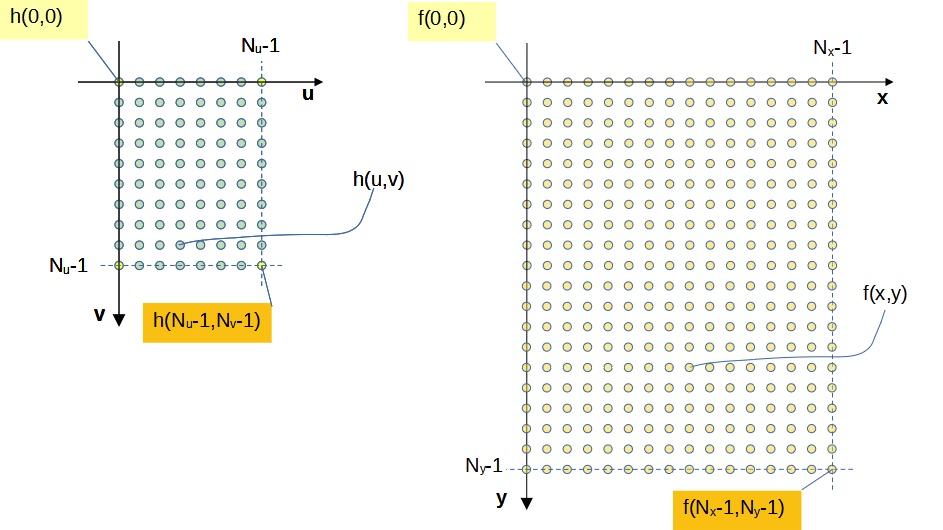

Depending on the choice of $x,y$ we distinguish three scenarios:

**scenario#1**

values $x,y$ have been chosen such that $f(x+u, y+v)$ is undefined for the full range of values $u$ and $y$. Thus the correlation $g_{corr}(x,y)$ is undefined as well. 

**scenario#2**

values $x,y$ have been chosen such that $f(x+u, y+v)$ is only undefined for some values of $u$ and $y$. The correlation $g_{corr}(x,y)$ is defined. (partial overlap of functions $f(x,y)$ and $h(u,v)$)


**scenario#3**

values $x,y$ have been chosen such that $f(x+u, y+v)$ is defined for all values of $u$ and $y$. The correlation $g_{corr}(x,y)$ is defined. (full overlap of functions $f(x,y)$ and $h(u,v)$)

The figure below shows two cases where there is a partial overlap of functions $f(x,y)$ and $h(u,v)$) and a case where there is full overlap.

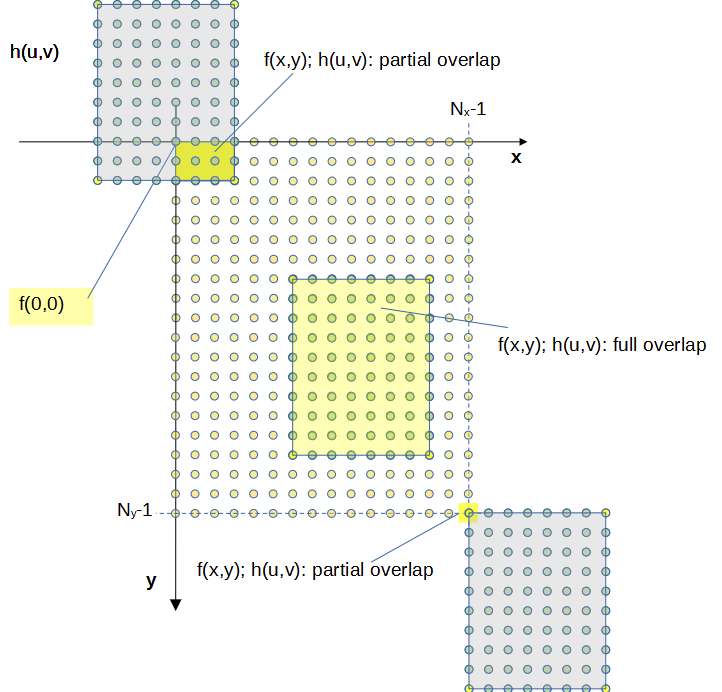

# Examples

Some examples shall demonstrate how to use `Scipy's` 2D correlation function `correlate2d`.

First two 2D arrays `fa` and `ha` are defined. With these arrays the experiments are computed.

### creating 2D arrays

In [2]:
fa = np.array([[1,2,3,4,5,6], 
                 [2,3,4,5,6,7],
                 [3,4,5,6,7,8],
                 [4,5,6,7,8,9],
                 [5,6,7,8,9,10]], dtype=np.uint8)


ha = np.array([[3,4], 
               [4,5],
               [5,6],
               [4,5]], dtype=np.uint8)

N_y, N_x = np.shape(fa)
N_v, N_u = np.shape(ha)
print(f"shape(fa): {np.shape(fa)}; N_x: {N_x} N_y: {N_y}")
print(f"shape(ha): {np.shape(ha)}; N_u: {N_u} N_v: {N_v}")

shape(fa): (5, 6); N_x: 6 N_y: 5
shape(ha): (4, 2); N_u: 2 N_v: 4


The correlation is then calculated with `Scipy` function `correlate2d` with several values of function parameter `mode`

### `mode='full'`

`out = scipy.signal.correlate2d(in1, in2, mode='full', boundary='fill', fillvalue=0)`

In [3]:
g_corr_a = signal.correlate2d(fa, ha, mode='full', boundary='fill', fillvalue=0)

N_y_g, N_x_g = np.shape(g_corr_a)
print(f"shape(g_corr_a): {np.shape(g_corr_a)}; N_x_g: {N_x_g} N_y_g: {N_y_g}\n")
print(f"g_corr_a:\n{g_corr_a}")

shape(g_corr_a): (8, 7); N_x_g: 7 N_y_g: 8

g_corr_a:
[[  5  14  23  32  41  50  24]
 [ 16  40  60  80 100 120  58]
 [ 32  74 103 132 161 190  91]
 [ 52 114 150 186 222   2 122]
 [ 72 150 186 222   2  38 138]
 [ 62 127 154 181 208 235 110]
 [ 41  82  98 114 130 146  67]
 [ 20  39  46  53  60  67  30]]


### `mode='valid'`

`out = scipy.signal.correlate2d(in1, in2, mode='valid', boundary='fill', fillvalue=0)`

In [4]:
g_corr_a = signal.correlate2d(fa, ha, mode='valid', boundary='fill', fillvalue=0)

N_y_g, N_x_g = np.shape(g_corr_a)
print(f"shape(g_corr_a): {np.shape(g_corr_a)}; N_x_g: {N_x_g} N_y_g: {N_y_g}\n")
print(f"g_corr_a:\n{g_corr_a}")

shape(g_corr_a): (2, 5); N_x_g: 5 N_y_g: 2

g_corr_a:
[[114 150 186 222   2]
 [150 186 222   2  38]]


### `mode='same'`

`out = scipy.signal.correlate2d(in1, in2, mode='same', boundary='fill', fillvalue=0)`

In [5]:
g_corr_a = signal.correlate2d(fa, ha, mode='same', boundary='fill', fillvalue=0)

N_y_g, N_x_g = np.shape(g_corr_a)
print(f"shape(g_corr_a): {np.shape(g_corr_a)}; N_x_g: {N_x_g} N_y_g: {N_y_g}\n")
print(f"g_corr_a:\n{g_corr_a}")

shape(g_corr_a): (5, 6); N_x_g: 6 N_y_g: 5

g_corr_a:
[[ 74 103 132 161 190  91]
 [114 150 186 222   2 122]
 [150 186 222   2  38 138]
 [127 154 181 208 235 110]
 [ 82  98 114 130 146  67]]


# Convolution / Equation

The following equation shall be used for the explicit definition of convolution:

$$
g_{conv}(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v - 1} f(x-u, y-v) \cdot h(u,v)
$$

As in the case of correlation the function $f(x,y)$ shall be defined for range of values $x$ and $y$:

$$
0 \le x \le N_x -1\\
0 \le y \le N_y -1
$$

Outside this range the product $f(x-u, y-v) \cdot h(u,v)$ in the double sum of the equation for convolution is not defined.
Hence the product contributes to the convolution only if:

$$
0 \le x-u \le N_x -1\\
0 \le y-v \le N_y -1
$$

Finally we observe that the convolution function $g_{conv}(x,y)$ is defined for $x$ and $y$ in the range:

$$
0 \le x \le N_x -1 + N_u - 1\\
0 \le y \le N_y -1 + N_v - 1
$$

----------

## convolution vs. correlation

Next it will be shown under which condition convolution can be evaluated by correlation.

We will first introduce variables $u'$ and $v'$ and require that the following relationships hold:

$$
u'+u=N_u -1 \to u=N_u -1 - u'\\
v'+v=N_v -1 \to v=N_v -1 - v'
$$

With this change of variables the convolution equation is expressed as:


$$
g_{conv}(x,y) = \sum_{u'=0}^{N_u - 1}\sum_{v'=0}^{N_v - 1} f(x-N_u +1 + u', y - N_v + 1 +v') \cdot h(N_u -1 - u',N_v -1 - v')
$$


Defining function $h_{flip-ud-lr}(u',v')$ by:

$$
h_{flip-ud-lr}(u',v') = h(N_u - 1 -u',N_v - 1 -v')
$$

convolution may be expressed by:

$$
g_{conv}(x,y) = \sum_{u'=0}^{N_u - 1}\sum_{v'=0}^{N_v - 1} f(x-N_u +1 + u', y - N_v + 1 +v') \cdot h_{flip-ud-lr}(u',v')
$$

The last equation is a 2D-correlation. It shows that with a flipped function $h_{flip-ud-lr}(u',v')$ convolution evaluates as correlation. Defining variables $x'$ and $y'$ 

$$
x' = x-N_u +1\\
y' = y - N_v + 1
$$

the last equation can be re-expressed like this:
$$
g_{conv}(x',y') = \underbrace{\sum_{u'=0}^{N_u - 1}\sum_{v'=0}^{N_v - 1} f(x' + u', y' +v') \cdot h_{flip-ud-lr}(u',v')}_{correlation}
$$

--------

## correlation vs. convolution

Correlation has been defined before by:

$$
g_{corr}(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v - 1} f(x+u, y+v) \cdot h(u,v)
$$

Again we will first introduce variables $u'$ and $v'$ and require that the following relationships hold:

$$
u'+u=N_u -1 \to u=N_u -1 - u'\\
v'+v=N_v -1 \to v=N_v -1 - v'
$$

With this change of variables the correlation equation is expressed as:

$$
g_{corr}(x,y) = \sum_{u'=0}^{N_u - 1}\sum_{v'=0}^{N_v - 1} f(x+N_u -1 - u', y+N_v -1 - v') \cdot h(N_u -1 - u',N_v -1 - v')
$$

Defining function $h_{flip-ud-lr}(u',v')$ by:

$$
h_{flip-ud-lr}(u',v') = h(N_u - 1 -u',N_v - 1 -v')
$$

correlation may be expressed by:

$$
g_{corr}(x,y) = \sum_{u'=0}^{N_u - 1}\sum_{v'=0}^{N_v - 1} f(x+N_u -1 - u', y+N_v -1 - v') \cdot h_{flip-ud-lr}(u',v')
$$

Defining variables $x'$ and $y'$ 

$$
x' = x-N_u +1\\
y' = y - N_v + 1
$$

the last equation can be re-expressed like this:

$$
g_{corr}(x',y') = \underbrace{\sum_{u'=0}^{N_u - 1}\sum_{v'=0}^{N_v - 1} f(x' - u', y' - v') \cdot h_{flip-ud-lr}(u',v')}_{convolution}
$$

**conclusion**

This equation defines a 2D convolution. Therefore 2D-correlation can be expressed as 2D-convolution with a modified function $h_{flip-ud-lr}(u', v')$ which is obtained from $h(u,v)$ by flipping rows (left-right) and columns (up-down).

## Experiments with correlation and convolution

### defining data for experiments

2D array `fa` is used as function $f(x,y)$

2D array `ha` is used as function $h(u,v)$

2D array `ha_ud_lr` obtained from `ha` by flipping rows and columns. It corresponds to $h_{flip-ud-lr}(u', v')$

In [6]:
fa = np.array([[1,2,3,4,5,6], 
                 [2,3,4,5,6,7],
                 [3,4,5,6,7,8],
                 [4,5,6,7,8,9],
                 [5,6,7,8,9,10]], dtype=np.float64)

ha = np.array([[3,4,5], 
               [4,5,6],
               [5,6,7],
               [6,7,8]], dtype=np.float64)

# flip array ha up-down and left-right
ha_ud_lr = np.flip(ha)

print(f"fa:\n{fa}\n")
print(f"ha:\n{ha}\n")
print(f"ha_ud_lr:\n{ha_ud_lr}")

fa:
[[ 1.  2.  3.  4.  5.  6.]
 [ 2.  3.  4.  5.  6.  7.]
 [ 3.  4.  5.  6.  7.  8.]
 [ 4.  5.  6.  7.  8.  9.]
 [ 5.  6.  7.  8.  9. 10.]]

ha:
[[3. 4. 5.]
 [4. 5. 6.]
 [5. 6. 7.]
 [6. 7. 8.]]

ha_ud_lr:
[[8. 7. 6.]
 [7. 6. 5.]
 [6. 5. 4.]
 [5. 4. 3.]]


### Demonstration#1

Convolving `fa` with `ha` (result: `g1`) is shown to be identical to correlation `fa` with `ha_ud_lr` (result: `g2`).

In [7]:
# showing that convolution and correlation yield same result if correlation uses flipped version of 2D array ha
g1= signal.convolve2d(fa, ha, mode='full', boundary='fill', fillvalue=0)

# using the flipped 2D array
g2= signal.correlate2d(fa, ha_ud_lr, mode='full', boundary='fill', fillvalue=0)

print(f"g1 (convolution):\n{g1}\n")
print(f"g2 (correlation):\n{g2}")

g1 (convolution):
[[  3.  10.  22.  34.  46.  58.  49.  30.]
 [ 10.  30.  62.  89. 116. 143. 118.  71.]
 [ 22.  62. 123. 168. 213. 258. 209. 124.]
 [ 40. 108. 208. 274. 340. 406. 324. 190.]
 [ 58. 148. 274. 340. 406. 472. 372. 216.]
 [ 58. 143. 258. 312. 366. 420. 326. 187.]
 [ 49. 118. 209. 248. 287. 326. 250. 142.]
 [ 30.  71. 124. 145. 166. 187. 142.  80.]]

g2 (correlation):
[[  3.  10.  22.  34.  46.  58.  49.  30.]
 [ 10.  30.  62.  89. 116. 143. 118.  71.]
 [ 22.  62. 123. 168. 213. 258. 209. 124.]
 [ 40. 108. 208. 274. 340. 406. 324. 190.]
 [ 58. 148. 274. 340. 406. 472. 372. 216.]
 [ 58. 143. 258. 312. 366. 420. 326. 187.]
 [ 49. 118. 209. 248. 287. 326. 250. 142.]
 [ 30.  71. 124. 145. 166. 187. 142.  80.]]


### Demonstration#2

Correlating `fa` with `ha` (result: `g3`) is shown to be identical to convolution of `fa` with `ha_ud_lr` (result: `g4`).

In [8]:
# showing that correlation and convolution yield same result if convolution uses flipped version of 2D array ha
g3= signal.correlate2d(fa, ha, mode='full', boundary='fill', fillvalue=0)

# using the flipped 2D array
g4= signal.convolve2d(fa, ha_ud_lr, mode='full', boundary='fill', fillvalue=0)

print(f"g3 (correlation):\n{g3}\n")
print(f"g4 (convolution):\n{g4}")

g3 (correlation):
[[  8.  23.  44.  65.  86. 107.  72.  36.]
 [ 23.  58. 103. 142. 181. 220. 146.  72.]
 [ 44. 103. 174. 228. 282. 336. 220. 107.]
 [ 70. 156. 254. 320. 386. 452. 292. 140.]
 [ 96. 204. 320. 386. 452. 518. 332. 158.]
 [ 74. 154. 237. 282. 327. 372. 235. 110.]
 [ 50. 102. 154. 181. 208. 235. 146.  67.]
 [ 25.  50.  74.  86.  98. 110.  67.  30.]]

g4 (convolution):
[[  8.  23.  44.  65.  86. 107.  72.  36.]
 [ 23.  58. 103. 142. 181. 220. 146.  72.]
 [ 44. 103. 174. 228. 282. 336. 220. 107.]
 [ 70. 156. 254. 320. 386. 452. 292. 140.]
 [ 96. 204. 320. 386. 452. 518. 332. 158.]
 [ 74. 154. 237. 282. 327. 372. 235. 110.]
 [ 50. 102. 154. 181. 208. 235. 146.  67.]
 [ 25.  50.  74.  86.  98. 110.  67.  30.]]


# Correlation / Convolution with `OpenCV`


Correlation and convolution in `OpenCV` is implemented by function `filter2D`

Contrary to `Scipy` functions `correlate2d` / `convolve2d` this function does **not** return the full correlation / convolution result.

The formula how function `filter2D` computes correlation is taken from the `OpenCV` reference:

$$
g_{corr}(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v - 1} f(x + u -m, y + v -k) \cdot h(u,v)
$$

The correlation $g_{corr}(x,y)$ is only computed for values $x$ and $y$ for which the function $f(x,y)$ is defined; namely:

$$
0 \le x \le N_x -1\\
0 \le y \le N_y -1
$$

As a consequence of this definition matrices representing $f(x,y)$ and $g_{corr}(x,y)$ have identical dimensions.

Values $m$ and $k$ are *offset values* to set a *center* value of the kernel $h(u,v)$. In the reference document the value pair $m,k$ is denoted as *anchor*. Moreover $m$ and $k$ should lie *within* the kernel. Thus $m,k$ should be in the range:

$$
0 \le m \le N_u -1\\
0 \le l \le N_v -1
$$

Choosing $m=-1, k=-1$ has a **special** meaning. The center of the kernel is chosen for this setting. While it is intuitively obvious what the *center* of the kernel $h(u,v)$ is if $N_u$ and $N_v$ are both odd numbers, the reference manual does not provide information what is regarded as *center* if one or both kernel dimension $N_u, N_v$ is an even number.

Having done some experiments the center of the kernel is internally computed by:

$$
m = floor\left(\frac{N_u}{2}\right)\\
k = floor\left(\frac{N_v}{2}\right)
$$

**example**

$$
N_u = 3\\
N_v = 4\\
\to m=1, k=2
$$

---------

Function `filter2D`is called like this in `Python`:

`filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	) -> 	dst`

`src` corresponds to $f(x,y)$

`ddepth` is chosen from a set of predefined values; it controls the numeric format of correlation result `dst`

`kernel` corresponds to $h(u,v)$

`dst` is the computed correlation $g_{corr}(x,y)$

`anchor`, `delta` and `borderType` are optional parameters. Frequently used are parameters are:

`anchor` which sets the center of the kernel $h(u,v)$

`borderType` offers some control over how **fill** values for function $f(x + u -m, y + v -k)$ are selected if $x + u -m$ and/or $y + v -k$ are **outside** their defined range:

$$
0 \le x + u -m \le N_x -1\\
0 \le y + v -k \le N_y -1
$$

In the examples (see below) we have chosen a centered anchor `anchor=(-1,-1)` and `borderType=cv2.BORDER_ISOLATED` (equivalent to `boundary='fill', fillvalue=0` in `Scipy` method `correlate2d / convolve2d`)

Optional parameter `delta` (default: 0) adds a fixed offset to the correlation result `dst`.

Some examples shall demonstrate how this function could be used.

In [10]:
# computing correlation 
g3_filter2D = cv2.filter2D(fa, -1, ha, anchor=(-1,-1), borderType=cv2.BORDER_ISOLATED)

print(f"g3_filter2D (correlation):\n{g3_filter2D}\n")

g3_filter2D (correlation):
[[ 58. 103. 142. 181. 220. 146.]
 [103. 174. 228. 282. 336. 220.]
 [156. 254. 320. 386. 452. 292.]
 [204. 320. 386. 452. 518. 332.]
 [154. 237. 282. 327. 372. 235.]]



In [17]:
N_v, N_u = ha.shape

# calculating the center (m,k) of the kernel explicitly
# it will be used as anchor=(m,k) in function filter2D as a replacement of anchor=(-1,-1)

m = N_u//2
k = N_v//2

print("dimensions of the kernel")
print(f"N_u: {N_u}")
print(f"N_v: {N_v}")
print(f"kernel center (m,k): ({m}, {k})")

dimensions of the kernel
N_u: 3
N_v: 4
kernel center (m,k): (1, 2)


In [16]:
# computing correlation (explicitly setting center of kernel)
g3_filter2D = cv2.filter2D(fa, -1, ha, anchor=(m,k), borderType=cv2.BORDER_ISOLATED)

print(f"g3_filter2D (correlation):\n{g3_filter2D}\n")

g3_filter2D (correlation):
[[ 58. 103. 142. 181. 220. 146.]
 [103. 174. 228. 282. 336. 220.]
 [156. 254. 320. 386. 452. 292.]
 [204. 320. 386. 452. 518. 332.]
 [154. 237. 282. 327. 372. 235.]]

